<a href="https://colab.research.google.com/github/itzrnvr/opencv-labs/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def transform_vertices(coords, matrix):
    return (matrix @ coords.T).T

poly_points = np.array([[0, 0], [2, 0], [2, 1], [0, 1], [0, 0]])
poly_h = np.concatenate([poly_points, np.ones((poly_points.shape[0], 1))], axis=1)

move_x, move_y = 3, 2
move_mtx = np.array([
    [1, 0, move_x],
    [0, 1, move_y],
    [0, 0, 1]
])
moved_poly = transform_vertices(poly_h, move_mtx)

scale_x, scale_y = 2, 1.5
scale_mtx = np.diag([scale_x, scale_y, 1])
scaled_poly = transform_vertices(poly_h, scale_mtx)

rot_angle = np.pi / 4
rot_mtx = np.array([
    [np.cos(rot_angle), -np.sin(rot_angle), 0],
    [np.sin(rot_angle), np.cos(rot_angle), 0],
    [0, 0, 1]
])
rot_poly = transform_vertices(poly_h, rot_mtx)

reflect_mtx = np.array([
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
])
reflected_poly = transform_vertices(poly_h, reflect_mtx)

shear_x, shear_y = 1, 0.5
shear_mtx = np.array([
    [1, shear_x, 0],
    [shear_y, 1, 0],
    [0, 0, 1]
])
sheared_poly = transform_vertices(poly_h, shear_mtx)


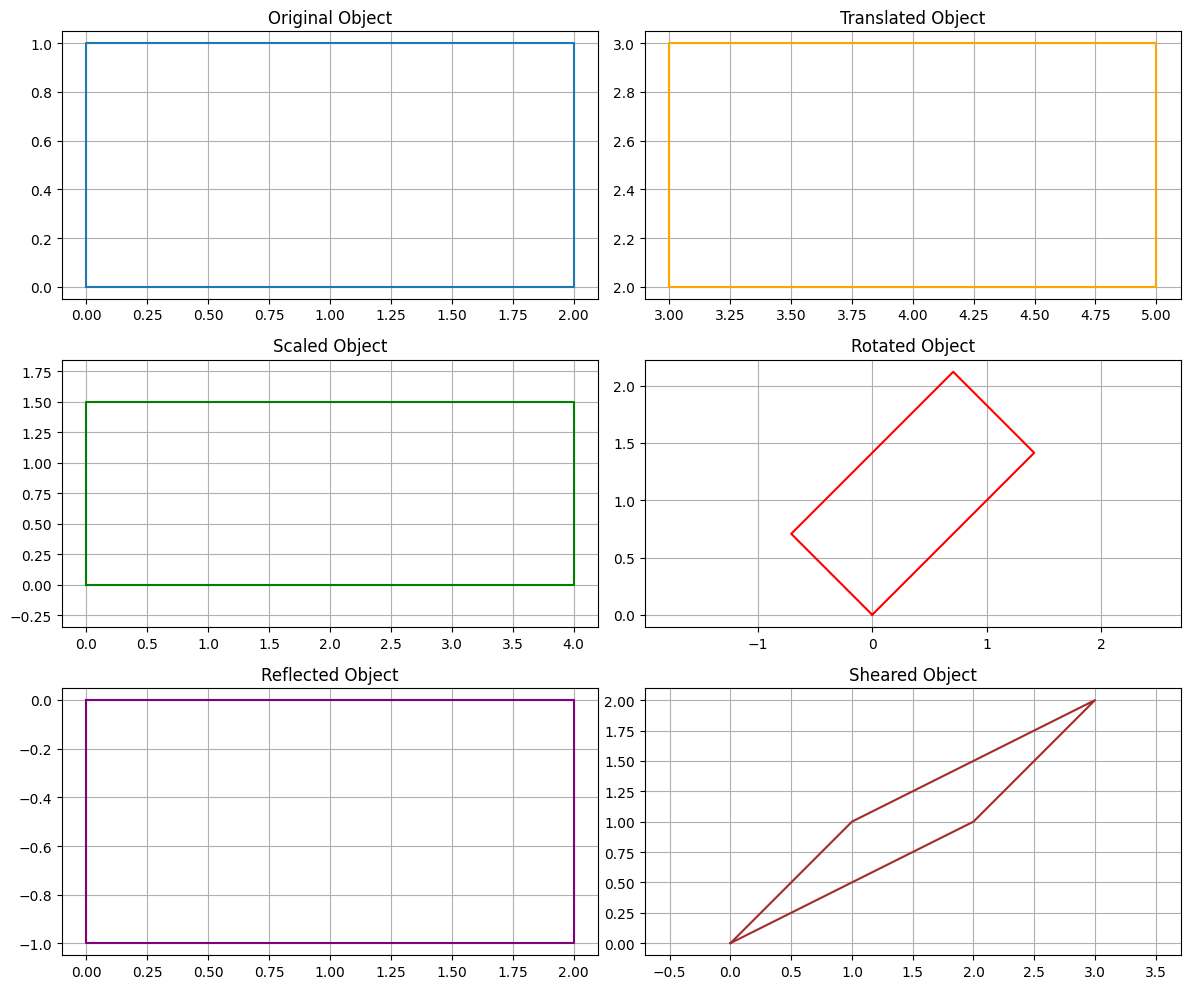

In [3]:
plt.figure(figsize=(12, 10))

plt.subplot(321)
plt.plot(poly_points[:, 0], poly_points[:, 1])
plt.title('Original Object')
plt.axis('equal')
plt.grid()

plt.subplot(322)
plt.plot(moved_poly[:, 0], moved_poly[:, 1], c='orange')
plt.title('Translated Object')
plt.axis('equal')
plt.grid()

plt.subplot(323)
plt.plot(scaled_poly[:, 0], scaled_poly[:, 1], c='green')
plt.title('Scaled Object')
plt.axis('equal')
plt.grid()

plt.subplot(324)
plt.plot(rot_poly[:, 0], rot_poly[:, 1], c='red')
plt.title('Rotated Object')
plt.axis('equal')
plt.grid()

plt.subplot(325)
plt.plot(reflected_poly[:, 0], reflected_poly[:, 1], c='purple')
plt.title('Reflected Object')
plt.axis('equal')
plt.grid()

plt.subplot(326)
plt.plot(sheared_poly[:, 0], sheared_poly[:, 1], c='brown')
plt.title('Sheared Object')
plt.axis('equal')
plt.grid()

plt.tight_layout()
plt.show()


# task 2

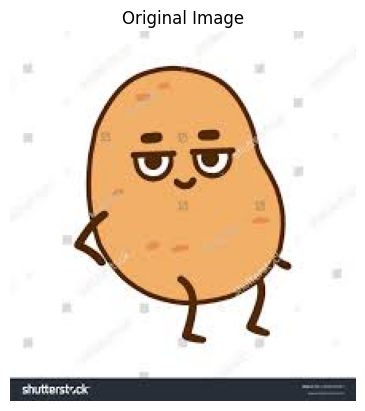

In [4]:
def display_img(caption, array):
    img_disp = cv2.cvtColor(array, cv2.COLOR_BGR2RGB)
    plt.imshow(img_disp)
    plt.title(caption)
    plt.axis('off')
    plt.show()

img_file = "pic.jpeg"
img = cv2.imread(img_file)
if img is None:
    print("Error: Image not found!")
    exit()
display_img("Original Image", img)


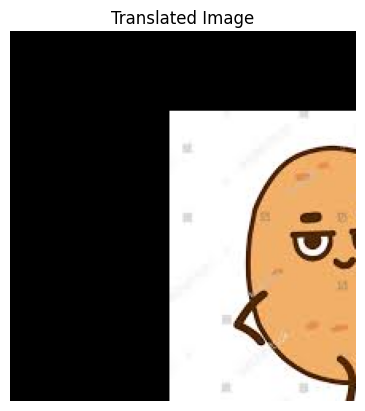

In [5]:
dx, dy = 100, 50
move_2d = np.array([[1, 0, dx], [0, 1, dy]], dtype=np.float32)
translated_img = cv2.warpAffine(img, move_2d, (img.shape[1], img.shape[0]))
display_img("Translated Image", translated_img)


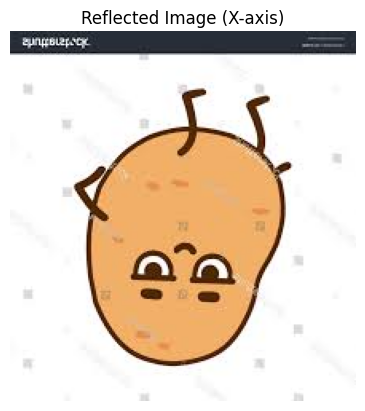

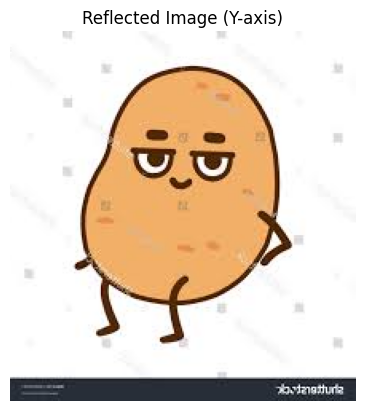

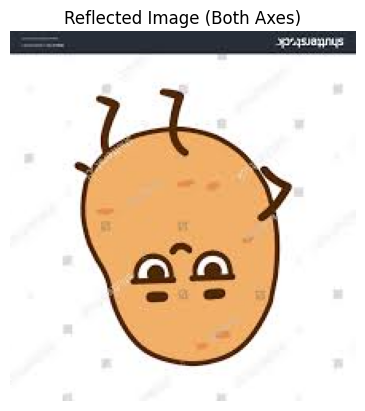

In [6]:
img_flip_x = cv2.flip(img, 0)
img_flip_y = cv2.flip(img, 1)
img_flip_xy = cv2.flip(img, -1)
display_img("Reflected Image (X-axis)", img_flip_x)
display_img("Reflected Image (Y-axis)", img_flip_y)
display_img("Reflected Image (Both Axes)", img_flip_xy)


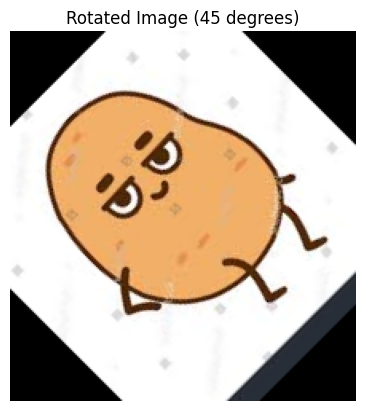

In [7]:
rot_deg = 45
img_center = (img.shape[1] // 2, img.shape[0] // 2)
rot2d_matrix = cv2.getRotationMatrix2D(img_center, rot_deg, 1)
rot_img = cv2.warpAffine(img, rot2d_matrix, (img.shape[1], img.shape[0]))
display_img("Rotated Image (45 degrees)", rot_img)


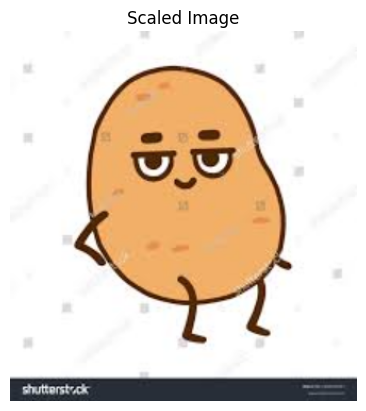

In [8]:
zoom_x, zoom_y = 1.5, 1.5
img_scaled = cv2.resize(img, None, fx=zoom_x, fy=zoom_y, interpolation=cv2.INTER_LINEAR)
display_img("Scaled Image", img_scaled)


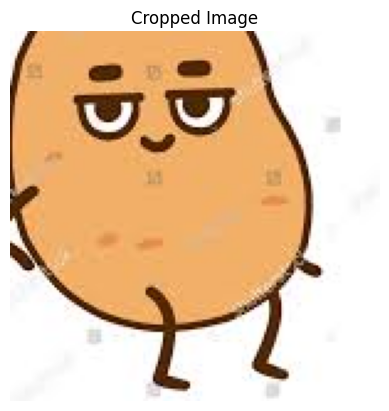

In [9]:
from_x, from_y, to_x, to_y = 50, 50, 200, 200
img_crop = img[from_y:to_y, from_x:to_x]
display_img("Cropped Image", img_crop)


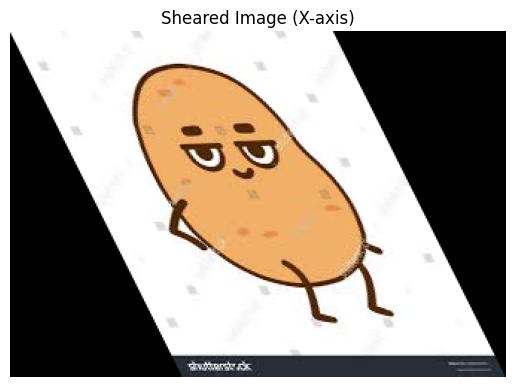

In [10]:
s_x = 0.5
shear_aff_x = np.array([[1, s_x, 0], [0, 1, 0]], dtype=np.float32)
w_shear_x = int(img.shape[1] + s_x * img.shape[0])
img_shear_x = cv2.warpAffine(img, shear_aff_x, (w_shear_x, img.shape[0]))
display_img("Sheared Image (X-axis)", img_shear_x)


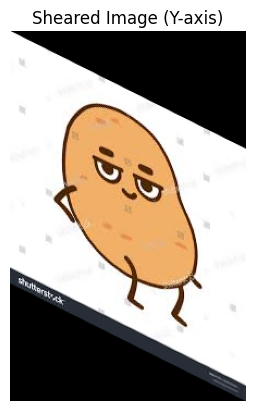

In [11]:
s_y = 0.5
shear_aff_y = np.array([[1, 0, 0], [s_y, 1, 0]], dtype=np.float32)
h_shear_y = int(img.shape[0] + s_y * img.shape[1])
img_shear_y = cv2.warpAffine(img, shear_aff_y, (img.shape[1], h_shear_y))
display_img("Sheared Image (Y-axis)", img_shear_y)
